In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt

from make_env_clean import contextual_env_distrib_and_reward
from roboverse.envs.sawyer_rig_affordances_v6 import SawyerRigAffordancesV6
from drawer_pnp_push_commands import drawer_pnp_push_commands

In [8]:
task_num = 1

# get the presampled goals
data_path = "sample_goal/"

full_open_close_str = ''
env_type = 'td_pnp_push'
eval_seed_str = f'_seed{task_num}'

eval_goals = os.path.join(data_path, f'{full_open_close_str}{env_type}_goals{eval_seed_str}.pkl')

print(eval_goals)

sample_goal/td_pnp_push_goals_seed1.pkl


In [9]:
env_kwargs = dict(
    test_env=True,  # relates to environment being fixed to 1 task
    downsample=True,
    env_obs_img_dim=196,
    test_env_command=drawer_pnp_push_commands[task_num]
)
reward_kwargs = dict(
    epsilon=3.0,
    obs_type='image',
    reward_type='highlevel',
    terminate_episode=True,
    use_pretrained_reward_classifier_path=False
)
env, distr, reward_fn = contextual_env_distrib_and_reward(
    env_id = None,
    env_class = SawyerRigAffordancesV6,
    env_kwargs = env_kwargs,
    goal_sampling_mode = 'presampled_images',
    presampled_goals_path = eval_goals,
    num_presample = 50,
    reward_kwargs = reward_kwargs,
    presampled_goals_kwargs = None, # not used
)

/home/jason/miniconda3/envs/pybullet/lib/python3.7/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


sample_goal/td_pnp_push_goals_seed1.pkl
filepath: sample_goal/td_pnp_push_goals_seed1.pkl
local_path: sample_goal/td_pnp_push_goals_seed1.pkl
loaded sample_goal/td_pnp_push_goals_seed1.pkl


In [15]:
def obs2img(obs):
    obs = obs.reshape(3, 48, 48)
    return np.transpose(obs, (2, 1, 0))

In [10]:
o = env.reset()
a = env.action_space.sample()
o, r, t, i = env.step(a)

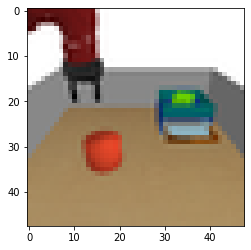

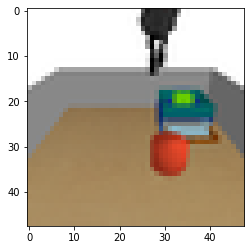

In [16]:
plt.imshow(obs2img(o['image_observation']))
plt.show()
plt.imshow(obs2img(o['image_desired_goal']))
plt.show()